In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [5]:
retail_df = pd.read_csv("retail_sales_dataset.csv")

In [6]:
#inspecting
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
#checking missing values
retail_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
#Total revenue by category
revenue_by_category = retail_df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(revenue_by_category)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


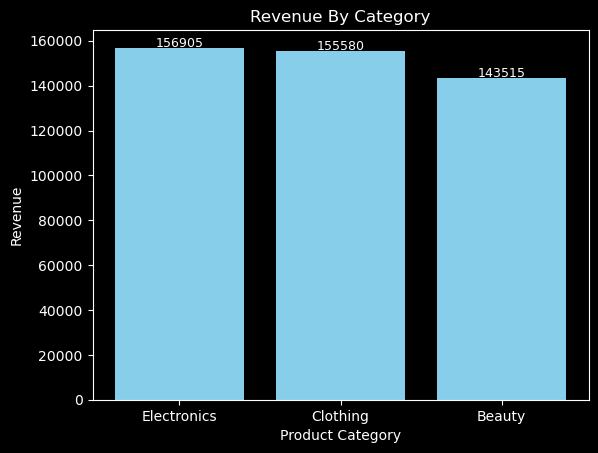

In [22]:
plt.style.use('dark_background')
plt.bar(revenue_by_category.index, revenue_by_category.values, color='skyblue')

plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue By Category')
plt.savefig('revenue_by_Category.png', dpi=300, bbox_inches='tight')

# Add values on top of bars
for i, val in enumerate(revenue_by_category.values):
    plt.text(i, val + 500, str(val), ha='center', fontsize=9)

plt.show()


In [10]:
#Lets find the montly Revenue
retail_df['Date'] = pd.to_datetime(retail_df['Date'])
retail_df['Month'] = retail_df['Date'].dt.to_period('M')

In [11]:
Montly_Revenue = retail_df.groupby('Month')['Total Amount'].sum()

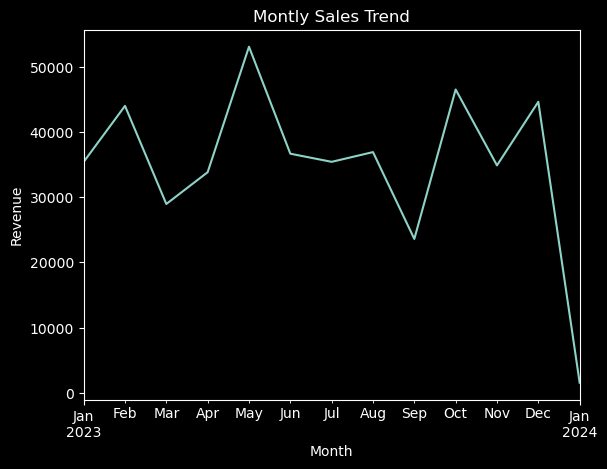

In [21]:
Montly_Revenue.plot (kind = 'line' , title = 'Montly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.savefig('revenue_by_month.png', dpi=300, bbox_inches='tight')
plt.show()